Maria Andrea Ranjana . A

Task 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING

In [50]:
#import the standard librires
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [51]:
df=pd.read_csv('C:\python_code\\car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [52]:
df.shape

(301, 9)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [54]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [55]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

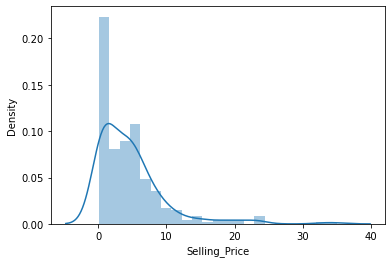

In [56]:
import seaborn as sns
sns.distplot(df['Selling_Price'])

In [57]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [58]:
df.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [59]:
corr=df.corr()
corr

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [60]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [61]:
df.Selling_type.value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [62]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [63]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [64]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace = True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [65]:
X =df.drop(['Car_Name','Selling_Price'],axis =1)
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [66]:
y = df['Selling_Price']

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=2 )

In [68]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [69]:
y_predict = lm.predict(x_test)

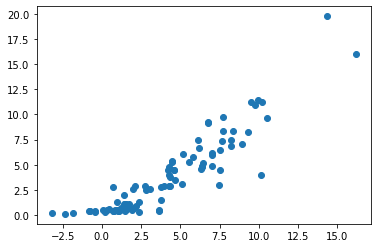

In [70]:
plt.scatter(y_predict,y_test)

In [71]:
from sklearn.metrics import r2_score
rqe_result = r2_score(y_test,y_predict)
rqe_result

0.8191491844928376

In [72]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_predict))
print(metrics.mean_squared_error(y_test,y_predict))
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

1.1943365235560206
2.609307153658878
1.6153349973484998


In [73]:
metrics.explained_variance_score(y_test,y_predict)

0.8252854217708495